# Final Project Python Results S01B-01
## Teammates: Kai Yang(Ben), Jiaheng Shao(Steve), Qianqian Xiao, Xiaoqi Zhong(Elly)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy.ma as ma
import datetime as dt 
import pingouin

In [3]:
data_1 = pd.read_excel("Regression 1.xlsx")
data_2 = pd.read_excel("Regression 2.xlsx")
data_3_1 = pd.read_excel("Regression 3-1.xlsx")
data_3_2 = pd.read_excel("Regression 3-2.xlsx")


/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
data_1.describe()

,Coupon,Market Average Spread,Rating,Issuing Amount,Tenor,Green Indicator,Russell ESG Score,interaction
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,2.677867,2.710537,3.663507,16.182512,2.301751,0.270142,1.806161,0.431280
std,0.716406,0.579811,0.720810,11.699642,1.676324,0.445089,0.612575,0.785504
min,1.250000,1.631200,0.000000,0.900000,0.101400,0.000000,0.600000,0.000000
25%,2.010000,2.332100,4.000000,7.955000,0.732850,0.000000,1.200000,0.000000
50%,2.830000,2.843900,4.000000,15.000000,3.000000,0.000000,2.000000,0.000000
75%,3.200000,3.111900,4.000000,20.000000,3.000000,1.000000,2.200000,0.800000
max,5.800000,3.817700,4.000000,70.000000,10.000000,1.000000,3.400000,3.400000


In [4]:
data_2.describe()

,Coupon,overnight,Refinitiv ESG Score,rating,Amount Issued (USD),Year,interaction
count,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,325.000000
mean,2.131516,-0.030102,71.726221,6.313846,6.402430e+08,12.897998,-0.664192
std,1.530129,0.758227,13.926764,2.143025,3.049984e+08,55.892825,10.575258
min,0.000000,-0.725932,9.392743,0.000000,5.504713e+07,2.252055,-36.345214
25%,0.875000,-0.565000,65.415338,5.000000,4.870494e+08,5.002740,-4.014140
50%,1.875000,-0.020000,73.964092,6.000000,5.000000e+08,7.005479,-0.200219
75%,2.950000,0.050700,79.827893,7.000000,7.792790e+08,10.010959,0.501781
max,7.594000,3.050000,94.613012,12.000000,2.500000e+09,1000.663014,68.449973


In [5]:
data_3_1.describe()

,Coupon,Bloomberg ESG Score,Credit Rating,Risk free rate with same tenor,Tenor,Option
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.10600,50.511266,4.950000,1.710351,8.067603,0.600000
std,1.62176,16.247770,2.763777,1.060749,7.176460,0.496139
min,0.25000,17.754753,1.000000,0.000000,2.002740,0.000000
25%,2.00000,40.627200,3.000000,0.924754,4.380822,0.000000
50%,2.87750,53.007746,4.000000,1.801878,5.265753,1.000000
75%,4.25000,61.570768,6.000000,2.782500,10.008219,1.000000
max,6.53600,79.810884,11.000000,3.600000,30.049315,1.000000


In [6]:
data_3_2.describe()

,coupon,Market Average Spread,Tenor,Credit rating,Issuer Type,Russeel ESG Score
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2.951579,2.433518,2.884884,3.578947,3.350877,1.596491
std,0.610058,0.248805,0.954558,0.905289,0.972685,0.648340
min,1.740000,1.690000,0.493200,0.000000,0.000000,0.600000
25%,2.600000,2.318800,3.000000,4.000000,3.000000,0.900000
50%,2.900000,2.426600,3.000000,4.000000,4.000000,1.600000
75%,3.250000,2.586000,3.000000,4.000000,4.000000,2.100000
max,5.800000,2.891400,5.000000,4.000000,4.000000,3.400000


In [4]:
#Test 1
## Processing the data
factors1 = ["Market Average Spread", "Rating", "Issuing Amount", "Tenor", "Green Indicator", "Russell ESG Score", "interaction"]

X1 = sm.add_constant(data_1[factors1])
model1 = sm.OLS(data_1["Coupon"], X1).fit()
# Fit the model
prediction1 = model1.predict(X1)
# Print the parameters of the fitted model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Coupon   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     146.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.13e-75
Time:                        17:08:42   Log-Likelihood:                -38.813
No. Observations:                 211   AIC:                             93.63
Df Residuals:                     203   BIC:                             120.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1715      0.184      0.932      0.352      -0.191       0.534
Market Average Spread     1.0509      0.065     16.193      0.000       0.923       1.179
Rating                   -0.1385      0.031     -4.499      0.000      -0.199      -0.078
Issuing Amount           -0.0031      0.002     -1.533      0.127      -0.007       0.001
Tenor                     0.0355      0.022      1.601      0.111      -0.008       0.079
Green Indicator          -0.1127      0.134     -0.841      0.401      -0.377       0.152
Russell ESG Score         0.0790      0.043      1.860      0.064      -0.005       0.163
interaction               0.0499      0.074      0.675      0.500      -0.096       0.196
==============================================================================
Omnibus:                      110.439   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.945
Skew:                           1.792   Prob(JB):                    2.99e-220
Kurtosis:                      13.106   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
## Obtaining the prediction and residual values
result1 = pd.concat([prediction1, model1.resid], axis =1)
result1 = result1.rename(columns = {0:'prediction', 1:'residual'})

In [9]:
## Print the regression results
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result1)

     prediction  residual
0         3.135     0.535
1         3.028     0.442
2         2.824     0.386
3         2.969     0.211
4         2.984     0.366
5         2.978     0.122
6         2.981     0.349
7         3.109     0.091
8         2.866     0.384
9         2.818     0.152
10        2.630     0.220
11        2.318     0.362
12        2.580     0.290
13        2.603     0.177
14        2.728     0.202
15        2.605     0.275
16        2.555     0.195
17        2.253    -0.253
18        2.650    -0.320
19        2.461    -0.211
20        2.296    -0.156
21        2.437    -0.207
22        2.201     0.029
23        2.296    -0.126
24        2.409     0.041
25        2.460     0.040
26        2.358     0.142
27        2.762    -0.162
28        2.286    -0.456
29        1.456     0.424
30        1.465     0.035
31        1.742    -0.132
32        1.739    -0.129
33        1.742    -0.132
34        1.612    -0.112
35        1.744     0.046
36        1.520    -0.050
37        1.

eval_env: 1


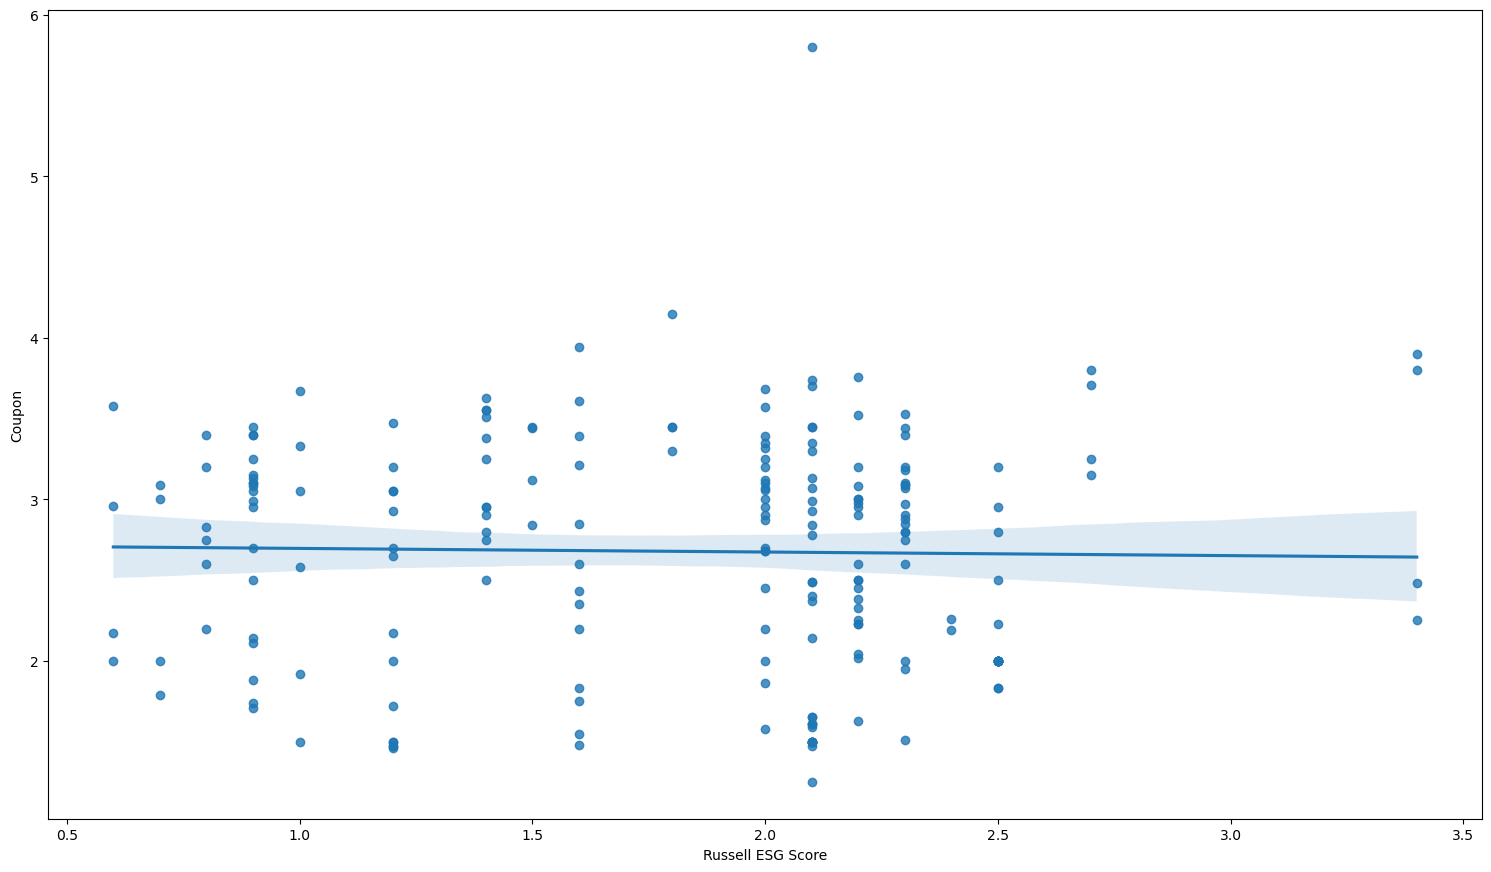

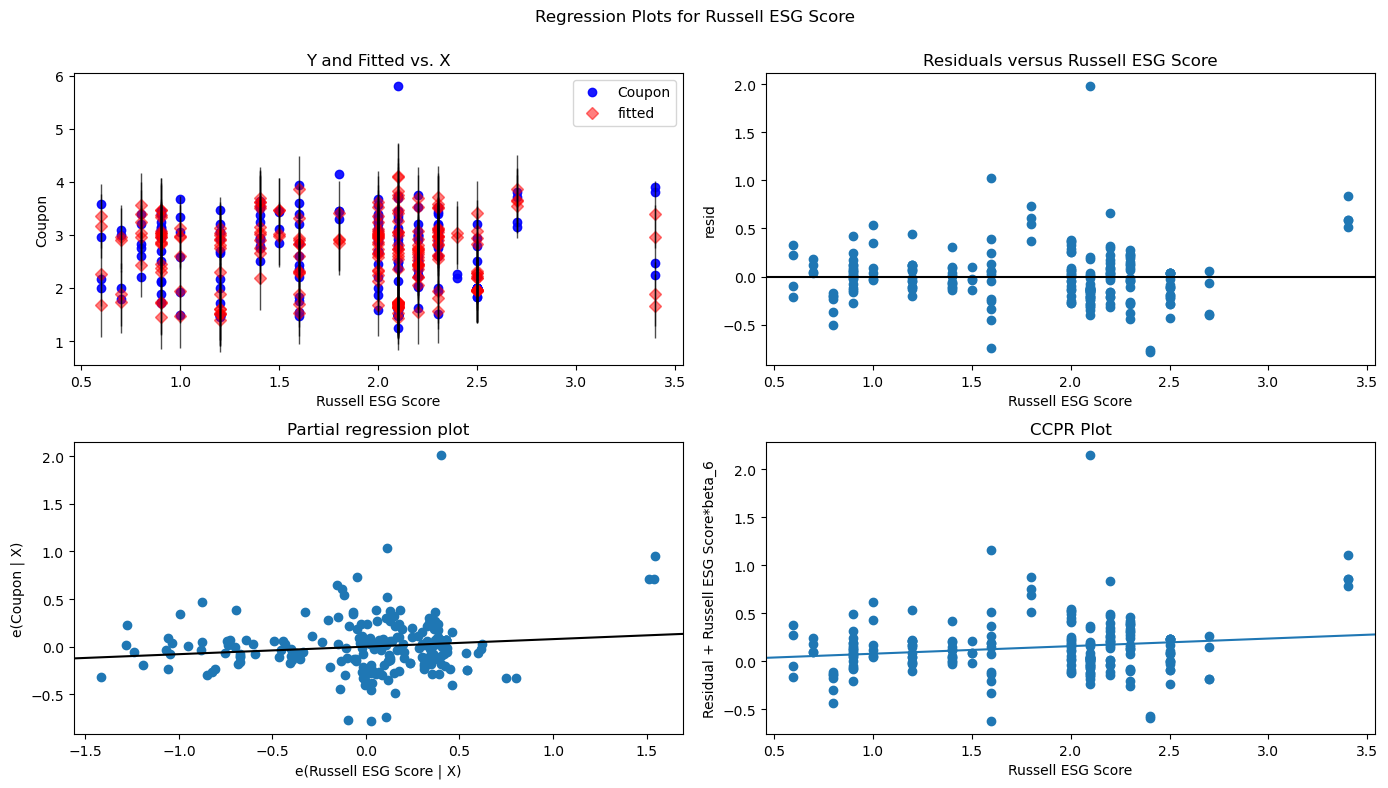

In [18]:
# ## Show the regression in charts
# for x in range(len(factors1)):
#     fig = plt.figure(figsize=(14, 8))
#     fig = sm.graphics.plot_regress_exog(model1,
#                                     factors1[x],
#                                     fig=fig)

g = sns.regplot(data = data_1, x="Russell ESG Score", y = "Coupon")
g.figure.set_size_inches(18.5, 10.5)
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model1,
                                    factors1[5],
                                    fig=fig)

In [11]:
## Anova test
pingouin.anova(data = data_1, dv = "Coupon", between = "Russell ESG Score")

,Source,ddof1,ddof2,F,p-unc,np2
0,Russell ESG Score,17,193,2.850154,0.000255,0.200671


<AxesSubplot:>

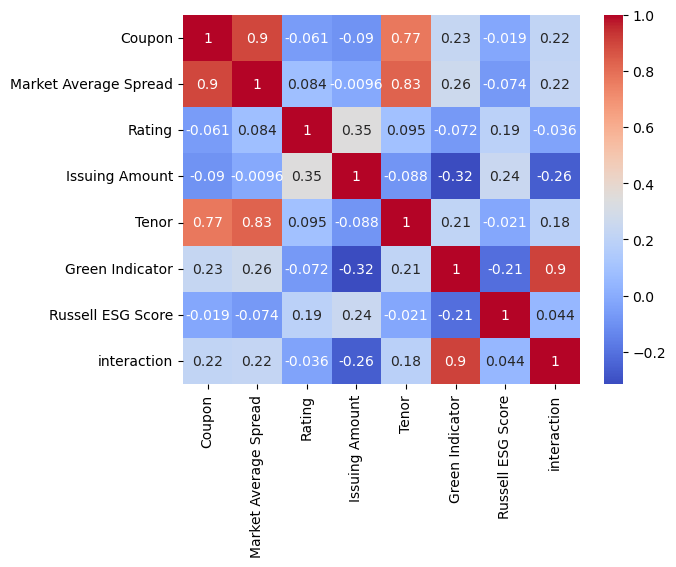

In [12]:
## Heatmaps
sns.heatmap(data_1.corr(), cmap='coolwarm', annot=True)

In [8]:
# Test 2
## Processing the data
factors2 = ["overnight", "Refinitiv ESG Score", "rating", "Amount Issued (USD)", "Year", "interaction"]

X2 = sm.add_constant(data_2[factors2])
model2 = sm.OLS(data_2["Coupon"], X2).fit()
# Fit the model
prediction2 = model2.predict(X2)
# Print the parameters of the fitted model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Coupon   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     67.73
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           5.76e-54
Time:                        17:12:30   Log-Likelihood:                -465.11
No. Observations:                 325   AIC:                             944.2
Df Residuals:                     318   BIC:                             970.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.5240      0.346     10.193      0.000       2.844       4.204
overnight               1.5647      0.106     14.786      0.000       1.356       1.773
Refinitiv ESG Score    -0.0078      0.004     -1.764      0.079      -0.017       0.001
rating                 -0.1565      0.028     -5.644      0.000      -0.211      -0.102
Amount Issued (USD)  3.087e-10   2.02e-10      1.530      0.127   -8.83e-11    7.06e-10
Year                    0.0002      0.001      0.154      0.877      -0.002       0.002
interaction            -0.0042      0.008     -0.538      0.591      -0.020       0.011
==============================================================================
Omnibus:                       34.505   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.585
Skew:                           0.754   Prob(JB):                     1.26e-10
Kurtosis:                       4.046   Cond. No.                     4.32e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
## Obtaining the prediction and residual values
result2 = pd.concat([prediction2, model2.resid], axis =1)
result2 = result2.rename(columns = {0:'prediction', 1:'residual'})

In [15]:
## Print the regression results
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result2)

     prediction  residual
0         3.254     1.121
1         1.959    -0.375
2         6.359    -1.234
3         3.372     1.378
4         6.107    -0.732
5         6.107    -0.732
6         6.020    -0.520
7         6.020    -0.520
8         3.203     1.547
9         3.194     0.306
10        2.916     0.209
11        3.118     0.595
12        3.264     1.611
13        2.669     0.456
14        2.760     0.115
15        3.367     1.133
16        5.712     0.541
17        5.712     0.541
18        3.094     0.031
19        2.653     3.347
20        2.176     1.074
21        4.721     0.404
22        4.734     0.641
23        5.337    -0.387
24        1.774     2.351
25        2.089     1.661
26        2.341     2.409
27        1.978     2.089
28        4.880     2.714
29        1.586     1.904
30        1.328     1.297
31        2.330     1.795
32        5.505    -0.755
33        6.601    -0.501
34        5.302    -1.152
35        6.111    -0.711
36        6.160    -0.560
37        1.

eval_env: 1


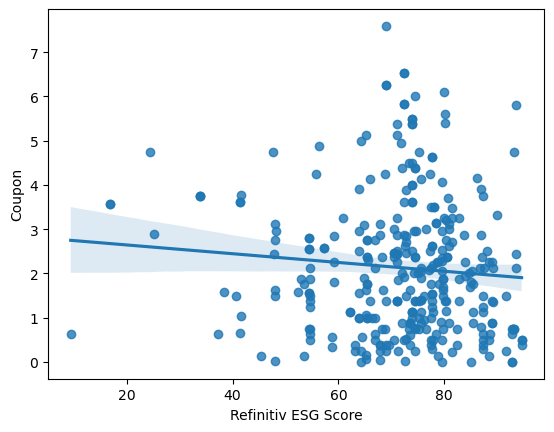

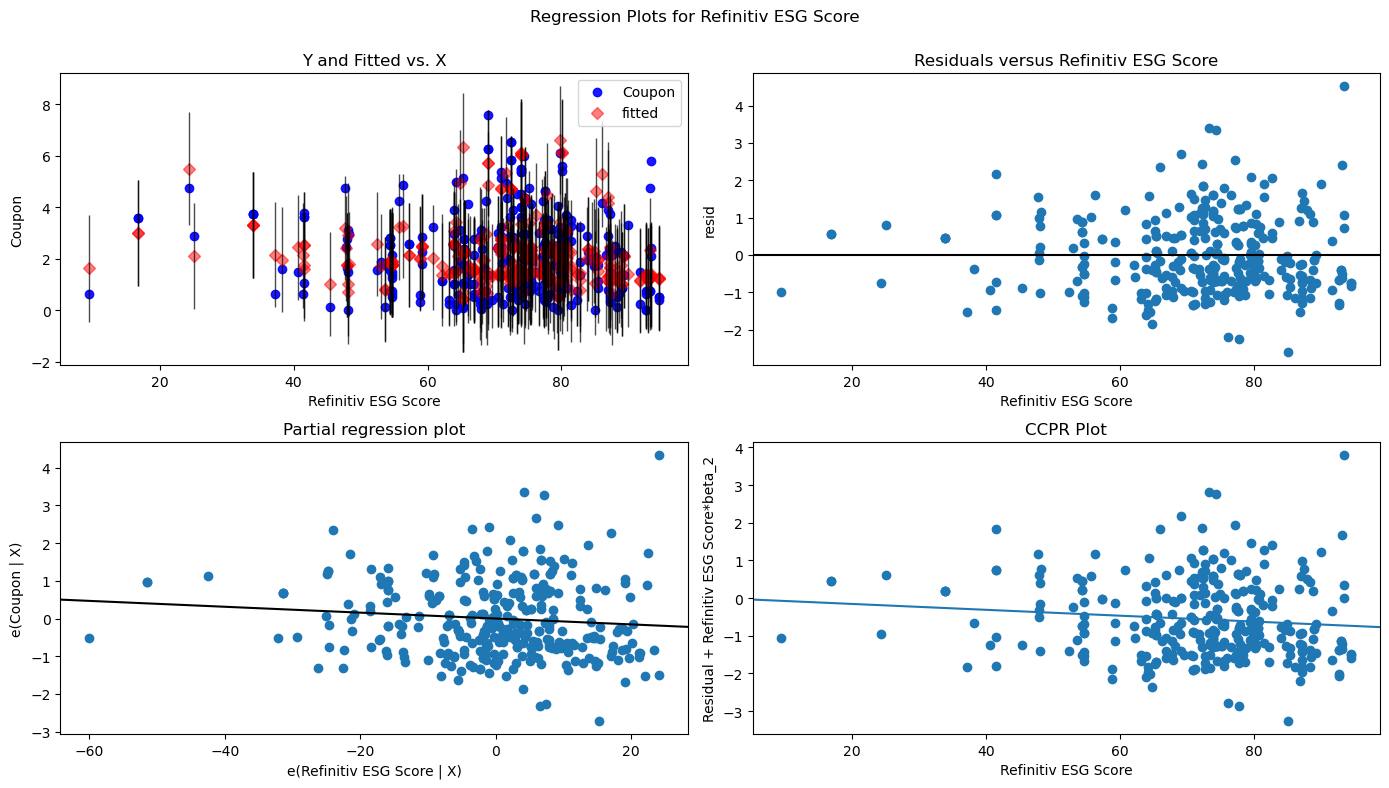

In [9]:
# ## Show the regression in charts
# for x in range(len(factors2)):
sns.regplot(data = data_2, x="Refinitiv ESG Score", y = "Coupon")
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model2,
                                    factors2[1],
                                    fig=fig)

In [17]:
## Anova test
pingouin.anova(data = data_2, dv = "Coupon", between = "Refinitiv ESG Score")

,Source,ddof1,ddof2,F,p-unc,np2
0,Refinitiv ESG Score,155,169,1.862813,0.000041,0.630792


<AxesSubplot:>

/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


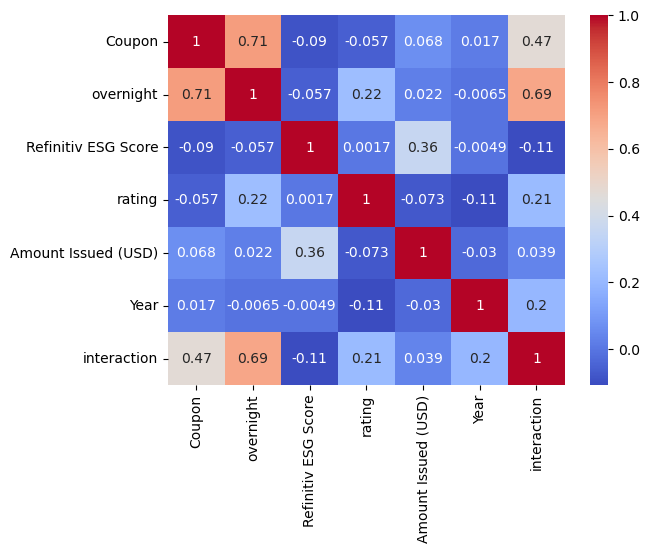

In [18]:
## Heatmap
sns.heatmap(data_2.corr(), cmap='coolwarm', annot=True)

In [10]:
# Test 3_1
## Processing the data
factors3_1 = ["Bloomberg ESG Score", "Credit Rating", "Risk free rate with same tenor", "Tenor", "Option"]

X3 = sm.add_constant(data_3_1[factors3_1])
model3_1 = sm.OLS(data_3_1["Coupon"], X3).fit()
# Fit the model
prediction3_1 = model3_1.predict(X3)
model3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Coupon   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     24.05
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           2.83e-10
Time:                        17:12:42   Log-Likelihood:                -45.347
No. Observations:                  40   AIC:                             102.7
Df Residuals:                      34   BIC:                             112.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.5290      0.865      1.767      0.086      -0.230       3.288
Bloomberg ESG Score                0.0071      0.015      0.487      0.630      -0.023       0.037
Credit Rating                     -0.1530      0.066     -2.310      0.027      -0.288      -0.018
Risk free rate with same tenor     1.0608      0.146      7.247      0.000       0.763       1.358
Tenor                              0.0300      0.021      1.403      0.170      -0.013       0.073
Option                            -0.1341      0.414     -0.324      0.748      -0.975       0.706
==============================================================================
Omnibus:                        2.534   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                2.359
Skew:                           0.558   Prob(JB):                        0.307
Kurtosis:                       2.587   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
## Obtaining the prediction and residual values
result3_1 = pd.concat([prediction3_1, model3_1.resid], axis =1)
result3_1 = result3_1.rename(columns = {0:'prediction', 1:'residual'})

In [21]:
## Print the regression results
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result3_1)

    prediction  residual
0        5.598    -0.648
1        5.236     0.864
2        4.806     1.730
3        4.156    -0.256
4        4.592    -0.217
5        4.945     0.930
6        4.872    -0.372
7        4.741    -0.491
8        4.493     0.132
9        4.992     1.133
10       2.835    -0.285
11       4.336    -0.461
12       2.916    -0.036
13       2.729    -0.929
14       3.283    -0.908
15       3.241    -0.941
16       4.673    -1.273
17       3.108    -0.837
18       4.114    -0.264
19       4.208    -0.583
20       2.326    -0.076
21       3.162     0.588
22       2.236     0.639
23       1.524     0.476
24       3.035    -0.535
25       3.087    -0.837
26       2.797     1.453
27       1.665    -0.790
28       4.215     0.535
29       1.690    -0.065
30       2.320     1.680
31       2.446     0.054
32       2.590     0.535
33       1.639    -0.014
34       0.601     0.852
35       0.285    -0.035
36       1.472     0.528
37       1.066     0.059
38       0.981    -0.356


eval_env: 1


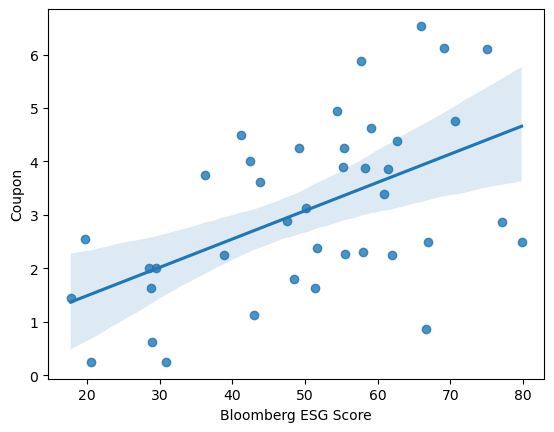

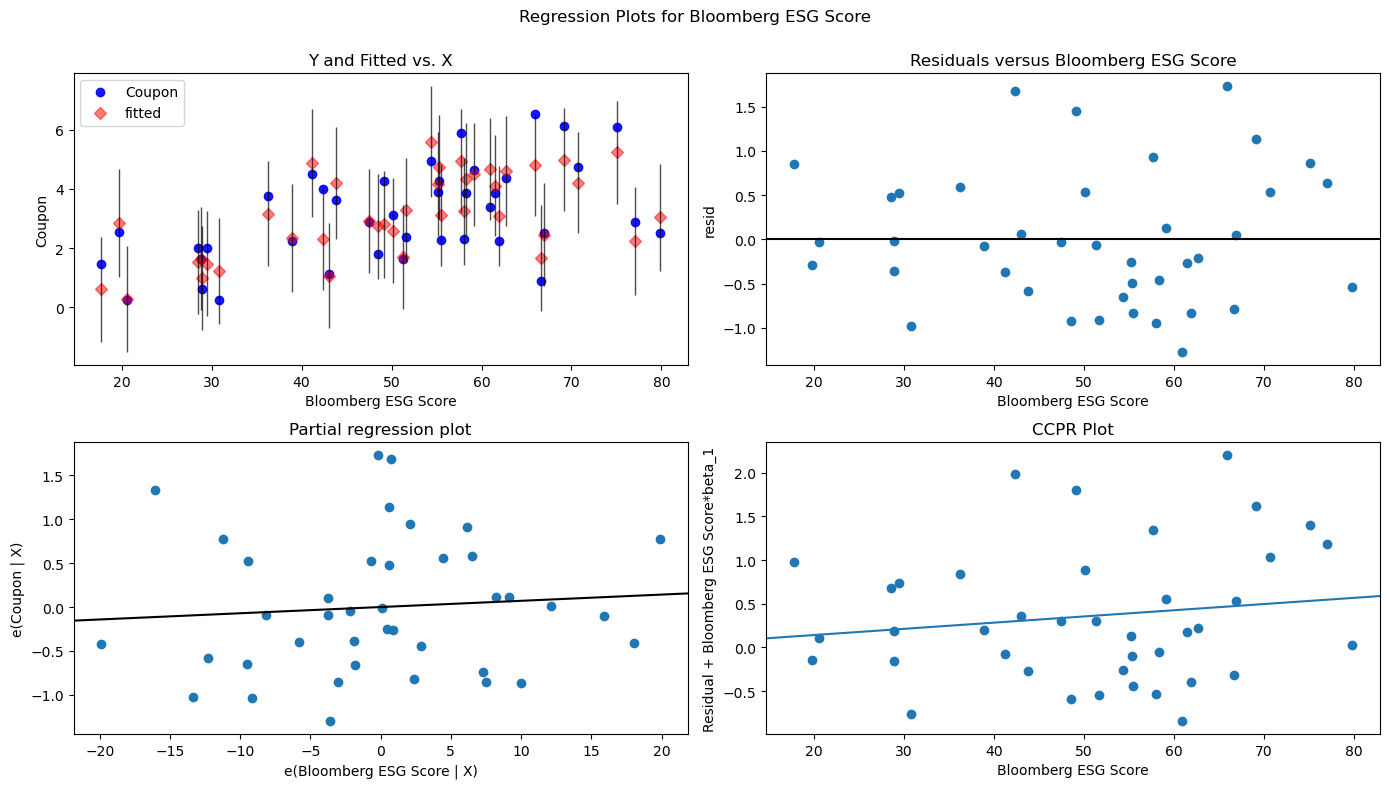

In [11]:
# ## Show the regression in charts
# for x in range(len(factors3_1)):
#     fig = plt.figure(figsize=(14, 8))
#     fig = sm.graphics.plot_regress_exog(model3_1,
#                                     factors3_1[x],
#                                     fig=fig)
sns.regplot(data = data_3_1, x="Bloomberg ESG Score", y = "Coupon")
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model3_1,
                                     factors3_1[0],
                                     fig=fig)

In [23]:
## Anova test
pingouin.anova(data = data_3_1, dv = "Coupon", between = "Bloomberg ESG Score")

/opt/anaconda3/lib/python3.9/site-packages/pingouin/parametric.py:1000: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2


,Source,ddof1,ddof2,np2
0,Bloomberg ESG Score,39,0,1.0


<AxesSubplot:>

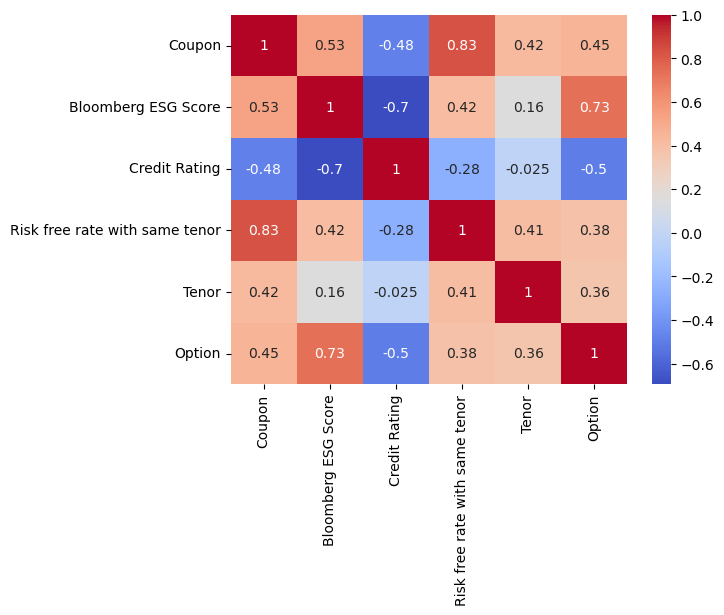

In [24]:
## Heatmaps
sns.heatmap(data_3_1.corr(), cmap='coolwarm', annot=True)

In [16]:
# Test 3_2
## Processing the data
factors3_2 = ["Market Average Spread", "Tenor", "Credit rating", "Issuer Type", "Russeel ESG Score"]

X3_2 = sm.add_constant(data_3_2[factors3_2])
model3_2 = sm.OLS(data_3_2["coupon"], X3_2).fit()
# Fit the model
prediction3_2 = model3_2.predict(X3_2)
# Print the parameters of the fitted model
model3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 coupon   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     37.57
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           5.86e-16
Time:                        17:13:39   Log-Likelihood:                -8.2004
No. Observations:                  57   AIC:                             28.40
Df Residuals:                      51   BIC:                             40.66
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3724      0.470      0.792      0.432      -0.572       1.316
Market Average Spread     1.6874      0.218      7.729      0.000       1.249       2.126
Tenor                     0.0571      0.057      1.006      0.319      -0.057       0.171
Credit rating            -0.2621      0.045     -5.829      0.000      -0.352      -0.172
Issuer Type              -0.2458      0.043     -5.773      0.000      -0.331      -0.160
Russeel ESG Score         0.0440      0.062      0.707      0.483      -0.081       0.169
==============================================================================
Omnibus:                        3.346   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                2.471
Skew:                           0.332   Prob(JB):                        0.291
Kurtosis:                       3.774   Cond. No.                         85.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
## Obtaining the prediction and residual values
result3_2 = pd.concat([prediction3_2, model3_2.resid], axis =1)
result3_2 = result3_2.rename(columns = {0:'prediction', 1:'residual'})

In [27]:
## Print the regression results
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result3_2)

    prediction  residual
0        2.977     0.353
1        2.957     0.243
2        1.791     0.209
3        1.520     0.220
4        2.695    -0.195
5        2.205    -0.095
6        1.959     0.391
7        2.530     0.320
8        2.540     0.210
9        2.708     0.092
10       2.937    -0.137
11       2.642    -0.042
12       3.647    -0.547
13       3.075     0.175
14       2.645     0.055
15       3.292     0.108
16       2.915     0.135
17       2.883     0.067
18       3.159     0.241
19       3.430     0.020
20       2.917     0.143
21       3.358    -0.008
22       3.465    -0.015
23       2.135     0.005
24       2.451    -0.081
25       3.049    -0.449
26       3.023    -0.273
27       3.166    -0.336
28       2.918    -0.428
29       3.321    -0.121
30       2.608     0.042
31       3.001    -0.301
32       2.889     0.161
33       3.834     0.066
34       3.096     0.004
35       4.902     0.898
36       2.916     0.084
37       3.043     0.047
38       3.432    -0.042


eval_env: 1


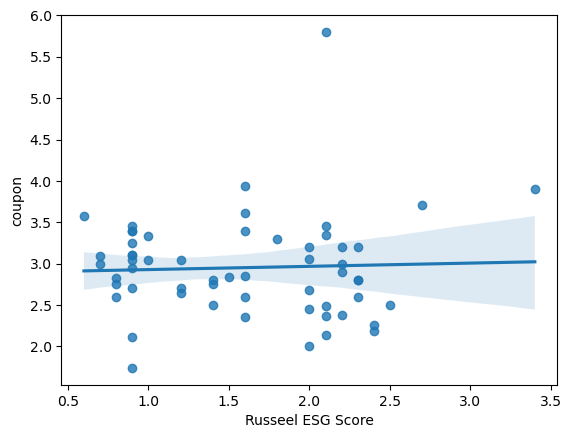

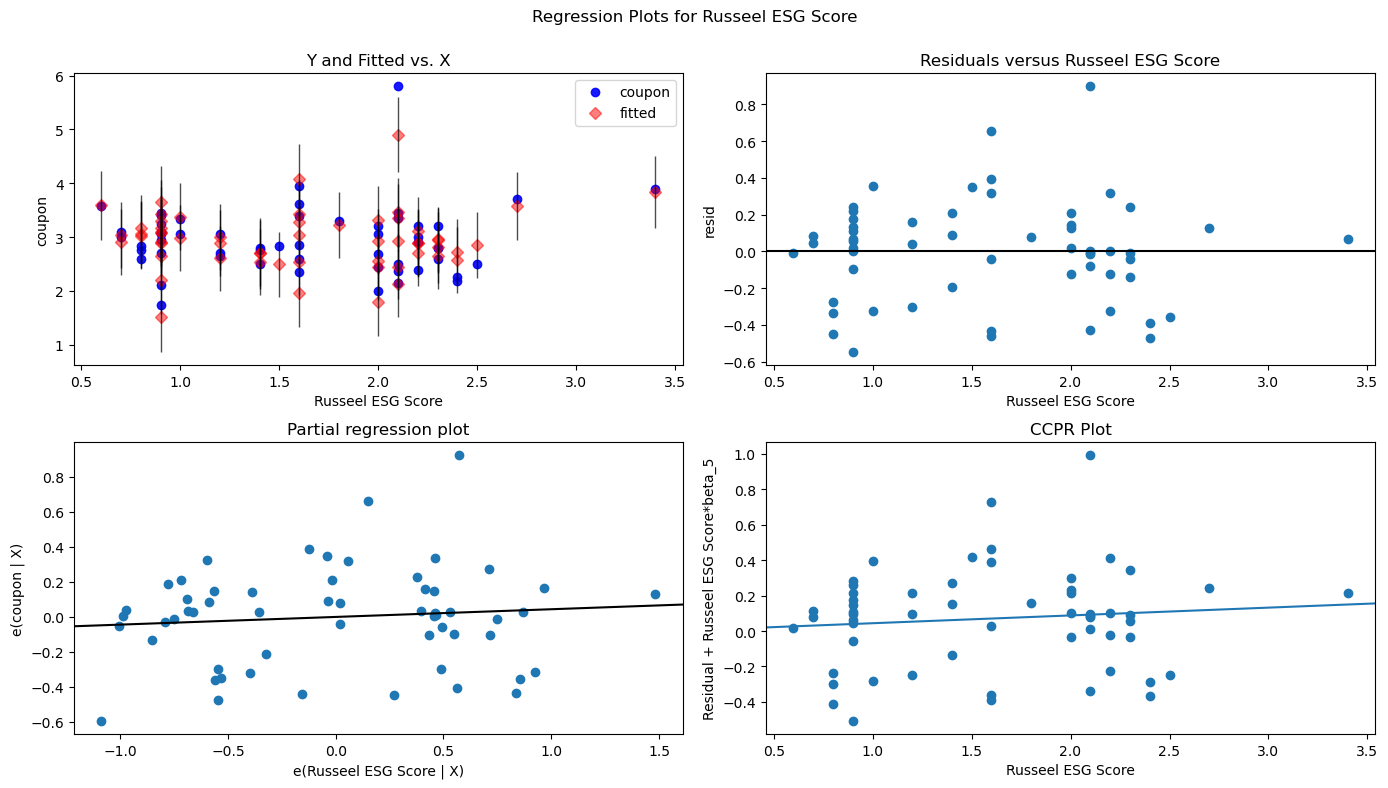

In [17]:
# ## Show the regression in charts
# for x in range(len(factors3_2)):
sns.regplot(data = data_3_2, x="Russeel ESG Score", y = "coupon")
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model3_2,
                                    factors3_2[4],
                                    fig=fig)

In [29]:
## Anova test
print(pingouin.anova(data = data_3_2, dv = "coupon", between = "Russeel ESG Score"))
print(pingouin.anova(data = data_3_2, dv = "coupon", between = "Issuer Type"))

              Source  ddof1  ddof2         F     p-unc       np2
0  Russeel ESG Score     17     39  0.733641  0.750581  0.242305
        Source  ddof1  ddof2         F     p-unc       np2
0  Issuer Type      4     52  3.218563  0.019578  0.198449


<AxesSubplot:>

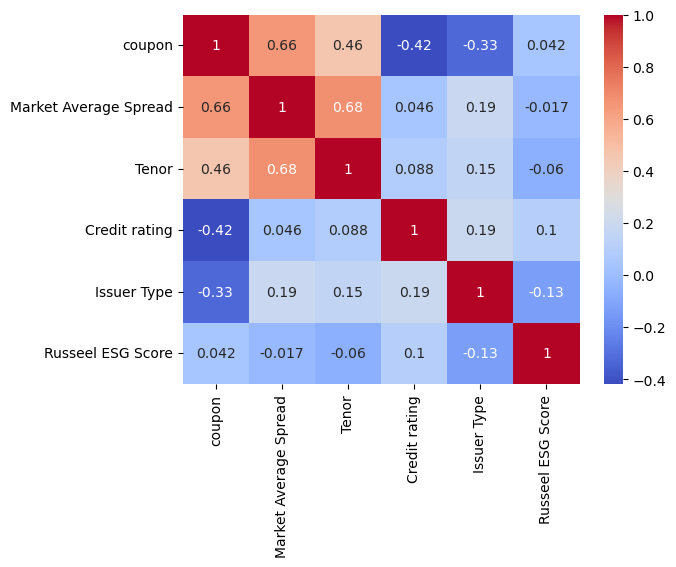

In [30]:
## Heatmaps
sns.heatmap(data_3_2.corr(), cmap='coolwarm', annot=True)